# Convolutional NN

In [12]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from src.si.data import Dataset, summary
from src.si.util.util import to_categorical

Load the MNIST dataset

In [13]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [14]:
train,test = load_mnist(500)

In [15]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [16]:
preprocess(train)
preprocess(test)

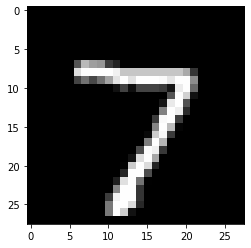

In [17]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [18]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [19]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [20]:
net.fit(train)

 epoch 1/2000 error = 0.36479387890782056
 epoch 2/2000 error = 0.3548399458391943
 epoch 3/2000 error = 0.34515246644886427
 epoch 4/2000 error = 0.33560398711945993
 epoch 5/2000 error = 0.32606354645364394
 epoch 6/2000 error = 0.31641314852674524
 epoch 7/2000 error = 0.30656592069596666
 epoch 8/2000 error = 0.29648058877698685
 epoch 9/2000 error = 0.28616516304244827
 epoch 10/2000 error = 0.275666073808413
 epoch 11/2000 error = 0.26504753102395673
 epoch 12/2000 error = 0.2543713417554541
 epoch 13/2000 error = 0.24368415588955764
 epoch 14/2000 error = 0.2330143079227171
 epoch 15/2000 error = 0.22237882526074976
 epoch 16/2000 error = 0.2117982734566121
 epoch 17/2000 error = 0.20131334320554267
 epoch 18/2000 error = 0.19099604555922461
 epoch 19/2000 error = 0.18094983529234673
 epoch 20/2000 error = 0.17129645566931492
 epoch 21/2000 error = 0.1621532927701675
 epoch 22/2000 error = 0.15361164228325827
 epoch 23/2000 error = 0.14572721959117244
 epoch 24/2000 error = 0.13

In [22]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
conv = net.layers[0]

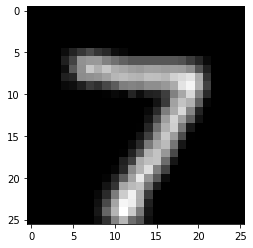

In [24]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))